# Лабораторная работа №4

### Используемые библиотеки

In [244]:
import pandas as pd
import mlxtend.frequent_patterns as fp
import mlxtend.preprocessing as pp
from matplotlib import pyplot as plt

### Исходные данные:
[`groceries - groceries.csv`](https://www.kaggle.com/irfanasrullah/groceries)

## Загрузка данных

In [245]:
all_data = pd.read_csv('groceries - groceries.csv')
print(all_data)

      Item(s)               Item 1               Item 2            Item 3  \
0           4         citrus fruit  semi-finished bread         margarine   
1           3       tropical fruit               yogurt            coffee   
2           1           whole milk                  NaN               NaN   
3           4            pip fruit               yogurt      cream cheese   
4           4     other vegetables           whole milk    condensed milk   
...       ...                  ...                  ...               ...   
9830       17              sausage              chicken              beef   
9831        1    cooking chocolate                  NaN               NaN   
9832       10              chicken         citrus fruit  other vegetables   
9833        4  semi-finished bread        bottled water              soda   
9834        5              chicken       tropical fruit  other vegetables   

                        Item 4         Item 5          Item 6  \
0         

In [246]:
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str)] for row in np_data]

In [247]:
unique_items = set([elem for row in np_data for elem in row])
print(f"Уникальные товары: {unique_items}")
print(f"Всего: {len(unique_items)}")

Уникальные товары: {'tropical fruit', 'bottled water', 'sausage', 'cooking chocolate', 'nut snack', 'salt', 'decalcifier', 'mayonnaise', 'frozen meals', 'UHT-milk', 'popcorn', 'butter', 'condensed milk', 'female sanitary products', 'fruit/vegetable juice', 'potato products', 'whisky', 'baby cosmetics', 'newspapers', 'candles', 'mustard', 'liqueur', 'pork', 'turkey', 'frozen vegetables', 'specialty cheese', 'chocolate', 'potted plants', 'whipped/sour cream', 'liquor', 'whole milk', 'roll products', 'snack products', 'dog food', 'pudding powder', 'soap', 'kitchen utensil', 'detergent', 'chewing gum', 'honey', 'waffles', 'frankfurter', 'liquor (appetizer)', 'organic sausage', 'salad dressing', 'canned fish', 'citrus fruit', 'other vegetables', 'coffee', 'salty snack', 'pet care', 'cocoa drinks', 'grapes', 'vinegar', 'pastry', 'white bread', 'specialty bar', 'long life bakery product', 'herbs', 'rolls/buns', 'berries', 'soda', 'misc. beverages', 'sound storage medium', 'sliced cheese', 'sh

## FPGrowth и FPMax

In [248]:
te = pp.TransactionEncoder()
data = pd.DataFrame(te.fit_transform(np_data), columns=te.columns_)

In [249]:
result = fp.fpgrowth(data, min_support=0.03, use_colnames=True)
pd.DataFrame(result)

,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.139502,(yogurt)
3,0.104931,(tropical fruit)
4,0.058058,(coffee)
...,...,...
58,0.033249,"(whole milk, pastry)"
59,0.047382,"(other vegetables, root vegetables)"
60,0.048907,"(whole milk, root vegetables)"
61,0.030605,"(rolls/buns, sausage)"


In [250]:
for i in range(1, max(list(map(lambda s: len(s), pd.DataFrame(result)['itemsets'].values))) + 1):
    res = result[result['itemsets'].apply(lambda x: len(x)) == i]
    mm = (max(res.values, key=lambda x: x[0]), min(res.values, key=lambda x: x[0]))
    print(f"""Для набора из {i} элементов:
        максимальное значение - {mm[0][0]} {list(mm[0][1])}
        минимальное - {mm[1][0]} {list(mm[1][1])}
    """)

Для набора из 1 элементов:
        максимальное значение - 0.25551601423487547 ['whole milk']
        минимальное - 0.03040162684290798 ['specialty chocolate']
    
Для набора из 2 элементов:
        максимальное значение - 0.07483477376715811 ['whole milk', 'other vegetables']
        минимальное - 0.030096593797661414 ['whole milk', 'pip fruit']
    


In [251]:
result = fp.fpmax(data, min_support=0.03, use_colnames=True)
pd.DataFrame(result)

,support,itemsets
0,0.030402,(specialty chocolate)
1,0.031012,(onions)
2,0.032944,(hygiene articles)
3,0.033249,(berries)
4,0.033249,(hamburger meat)
5,0.033452,(UHT-milk)
6,0.033859,(sugar)
7,0.037112,(dessert)
8,0.037417,(long life bakery product)
9,0.037824,(salty snack)


In [252]:
for i in range(1, max(list(map(lambda s: len(s), pd.DataFrame(result)['itemsets'].values))) + 1):
    res = result[result['itemsets'].apply(lambda x: len(x)) == i]
    mm = (max(res.values, key=lambda x: x[0]), min(res.values, key=lambda x: x[0]))
    print(f"""Для набора из {i} элементов:
        максимальное значение - {mm[0][0]} {list(mm[0][1])}
        минимальное - {mm[1][0]} {list(mm[1][1])}
    """)

Для набора из 1 элементов:
        максимальное значение - 0.09852567361464158 ['shopping bags']
        минимальное - 0.03040162684290798 ['specialty chocolate']
    
Для набора из 2 элементов:
        максимальное значение - 0.07483477376715811 ['whole milk', 'other vegetables']
        минимальное - 0.030096593797661414 ['pip fruit', 'whole milk']
    


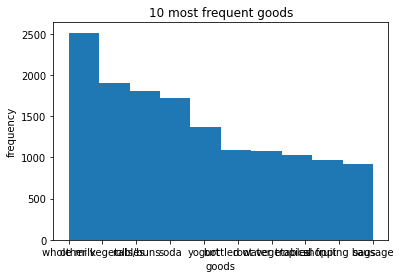

In [253]:
frequent = list(map(lambda item: sum(sum(1 for it in st if it == item) for st in np_data), unique_items))
labeled = sorted(zip(unique_items, frequent), key=lambda x: x[1], reverse=True)[:10]

axis = plt.gca()
axis.hist(range(0, len(labeled)), weights=list(map(lambda x: x[1], labeled)), bins=10)
axis.set_title("10 most frequent goods")
axis.set_xlabel("goods")
axis.set_ylabel("frequency")
axis.set_xticks(range(0, len(labeled)))
axis.set_xticklabels(list(map(lambda x: x[0], labeled)))
plt.show()

In [254]:
items = ['whole milk', 'yogurt', 'soda', 'tropical fruit', 'shopping bags', 'sausage', 'whipped/sour cream', 'rolls/buns', 'other vegetables', 'root vegetables', 'pork', 'bottled water', 'pastry', 'citrus fruit', 'canned beer', 'bottled beer']
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str) and elem in items] for row in np_data]
te = pp.TransactionEncoder()
data = pd.DataFrame(te.fit_transform(np_data), columns=te.columns_)
result = fp.fpgrowth(data, min_support=0.03, use_colnames=True)
pd.DataFrame(result)

,support,itemsets
0,0.082766,(citrus fruit)
1,0.139502,(yogurt)
2,0.104931,(tropical fruit)
3,0.255516,(whole milk)
4,0.193493,(other vegetables)
5,0.183935,(rolls/buns)
6,0.080529,(bottled beer)
7,0.110524,(bottled water)
8,0.174377,(soda)
9,0.088968,(pastry)


In [255]:
# TODO: как построить график? Что значит "кривые для набора товаров"?
for i in range(1, 10):
    result = fp.fpgrowth(data, min_support=i / 100, use_colnames=True)
    for j in range(1, 10):
        print(f"Association rules number for support {i}/100 and threshold {j}/100: {len(fp.association_rules(result, min_threshold=j / 100, metric='confidence'))}")
    print()

Association rules number for support 1/100 and threshold 1/100: 330
Association rules number for support 1/100 and threshold 2/100: 330
Association rules number for support 1/100 and threshold 3/100: 330
Association rules number for support 1/100 and threshold 4/100: 328
Association rules number for support 1/100 and threshold 5/100: 320
Association rules number for support 1/100 and threshold 6/100: 307
Association rules number for support 1/100 and threshold 7/100: 292
Association rules number for support 1/100 and threshold 8/100: 279
Association rules number for support 1/100 and threshold 9/100: 272

Association rules number for support 2/100 and threshold 1/100: 102
Association rules number for support 2/100 and threshold 2/100: 102
Association rules number for support 2/100 and threshold 3/100: 102
Association rules number for support 2/100 and threshold 4/100: 102
Association rules number for support 2/100 and threshold 5/100: 102
Association rules number for support 2/100 and 

## Ассоциативные правила